In [2]:
import pandas as pd
import json
import numpy as np

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from pprint import pprint

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_csv('./data/bfo_df_master_20211206.csv')

lit_df = df[df['doi']!='Sutter-Fella Lab']

print("Number of recipes from literature: ", len(lit_df))

display(lit_df)

Number of recipes from literature:  340


,Unnamed: 0,recipe_id,url,doi,source_Bi,source_Bi_amount,source_Fe,source_Fe_amount,bi_fe_ratio,separate_hydrolysis,solvent1,solvent1_amount_ml,solvent2,solvent2_amount_ml,solv1_solv2_ratio,chelating_agent1,chelating_agent1_amount_ml,chelating_agent2,chelating_agent2_amount_ml,chelating_agent3,chelating_agent3_amount_ml,solv_chel_ratio,dehydrating_agent1,dehydrating_agent1_amount_ml,dehydrating_agent2,dehydrating_agent2_amount,solv_dehydr_ratio,surfactant,surfactant_amount,solv_surfactant_ratio,precursor_concentration,pH,substrate,subtrate_orientation,stirring_time_hr,stirring_temp_degC,age_days,age_temp_degC,low_coating_time_sec,low_coating_rpm,high_coating_time_sec,high_coating_rpm,dry_time_min,dry_degC,layer_prebake_time_min,layer_prebake_degC,layer_annealing_time_min,layer_annealing_degC,layers,final_prebake_time_min,final_prebake_degC,final_annealing_time_hr,final_annealing_degC,atmosphere,reported_impurities,space_group,main_XRD_peaks,thin_film_thickness_nm,validation_KC,validation_VB,Validation_Notes,Extraction_Notes
0,0,1.0,https://link.springer.com/content/pdf/10.1007/...,10.1007/s00339-016-9628-3,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,Pt/Ti/SiO2/Si,Si(100),3,50.0,2.00000,25.0,15.0,400.0,30.0,4000.0,NaN,NaN,5.0,280.0,5.000000,550.0,12,NaN,NaN,0.333333,550.0,O2,[],R3c,"(012), (104), (110)",NaN,NaN,completed,"RTA for intermediate annealing, assumed atmosp...","coating, prebake (280 5min), anneal (550 5min)..."
1,1,2.0,https://link.springer.com/article/10.1007/s108...,10.1007/s10853-014-8318-9,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.050,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,acetic_acid,NaN,NaN,NaN,NaN,NaN,NaN,acetic_acid_glacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,NaN,glass/ITO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,550.0,N2,[],R3c,"(102), (104), (110)",350.0,NaN,completed,NaN,Mn doping; solution prep described in 10.1063/...
2,2,3.0,https://www.researchgate.net/profile/Muniyandi...,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethanolamine,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,1.000000,600.0,air,['amorphous'],NaN,NaN,NaN,NaN,completed,NaN,"might want to delete, no pre-firing"
3,3,4.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethanolamine,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.0,350.0,NaN,NaN,5,NaN,NaN,1.000000,600.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; used to...
4,4,5.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethanolamine,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.0,350.0,NaN,NaN,5,NaN,NaN,3.000000,500.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; impurit...
5,5,6.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethanolamine,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,NaN,NaN,30.0,3000.0,NaN,NaN,5.0,350.0,NaN,NaN,5,NaN,NaN,6.000000,500.0,air,['Bi2Fe4O9'],R3c,"(012), (104), (110)",NaN,NaN,completed,NaN,coating and pre-fire repeated 5 times; impurit...
6,6,7.0,NaN,10.1007/s10854-013-1374-0,bi_nitrate_pentahydrate,NaN,fe_nitrate_nonahydrate,NaN,1.100,NaN,2_methoxyethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ethanolamine,NaN,NaN,NaN,NaN,glass,NaN,1,25.0,NaN,NaN,N

{'phase_impure_pubs': 52,
 'phase_impure_syntheses': 89,
 'phase_pure_pubs': 126,
 'phase_pure_syntheses': 251}


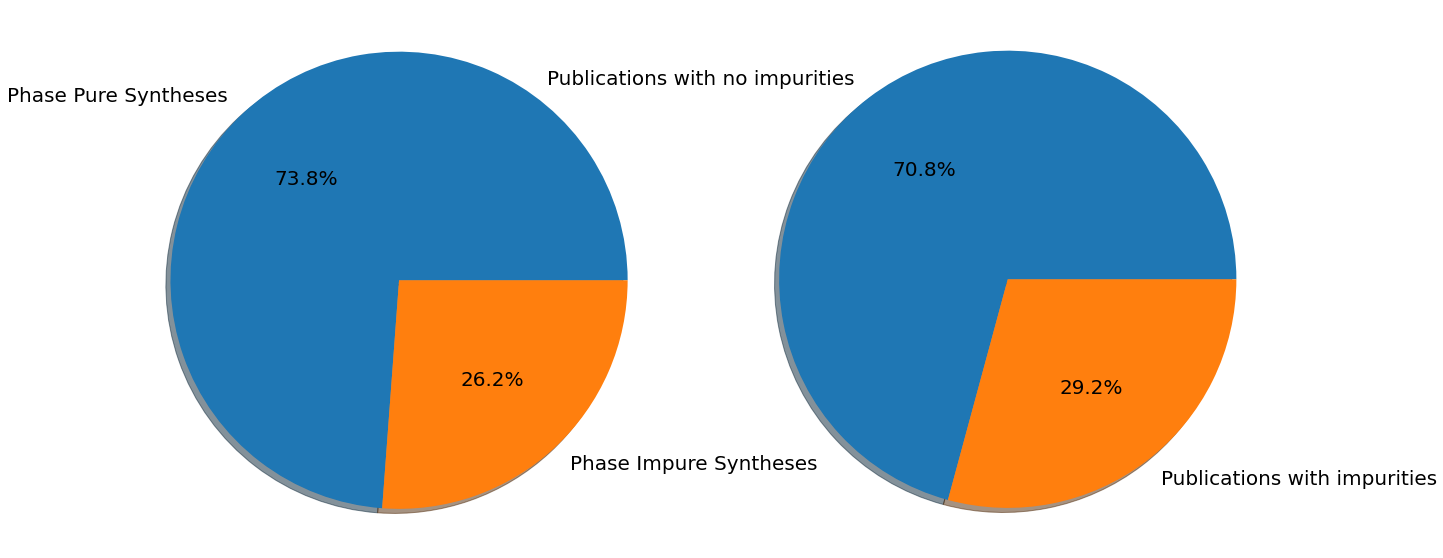

In [5]:
# Visualizations of impurity phases

# counts of frequency of phase pure syntheses vs. phase impure
phase_purity = {
    'phase_pure_syntheses' : 0,
    'phase_pure_pubs' : 0,
    'phase_impure_syntheses' : 0,
    'phase_impure_pubs' : 0
}

current_doi = None
impure_pub = False
for doi, rep in zip(lit_df['doi'], lit_df['reported_impurities']):
    if rep == "[]":
        phase_purity['phase_pure_syntheses'] += 1
    else:
        phase_purity['phase_impure_syntheses'] += 1
        impure_pub = True 
        
    if doi != current_doi:
        if not impure_pub:
            phase_purity['phase_pure_pubs'] += 1
        else:
            phase_purity['phase_impure_pubs'] += 1
            
        current_doi = doi
        impure_pub = False

pprint(phase_purity)

synth_labels = 'Phase Pure Syntheses', 'Phase Impure Syntheses'
synth_sizes = phase_purity['phase_pure_syntheses'], phase_purity['phase_impure_syntheses']

pub_labels = 'Publications with no impurities', 'Publications with impurities'
pub_sizes = phase_purity['phase_pure_pubs'], phase_purity['phase_impure_pubs']

fig, (synth_ax, pub_ax) = plt.subplots(1,2, figsize=(20,10))
synth_ax.pie(synth_sizes, labels=synth_labels, autopct='%1.1f%%',
        shadow=True, startangle=0, textprops={'fontsize': 20})
synth_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

pub_ax.pie(pub_sizes, labels=pub_labels, autopct='%1.1f%%',
        shadow=True, startangle=0, textprops={'fontsize': 20})
pub_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig.savefig('./CABB_thinfilm_Paper/additives.png', bbox_inches='tight')

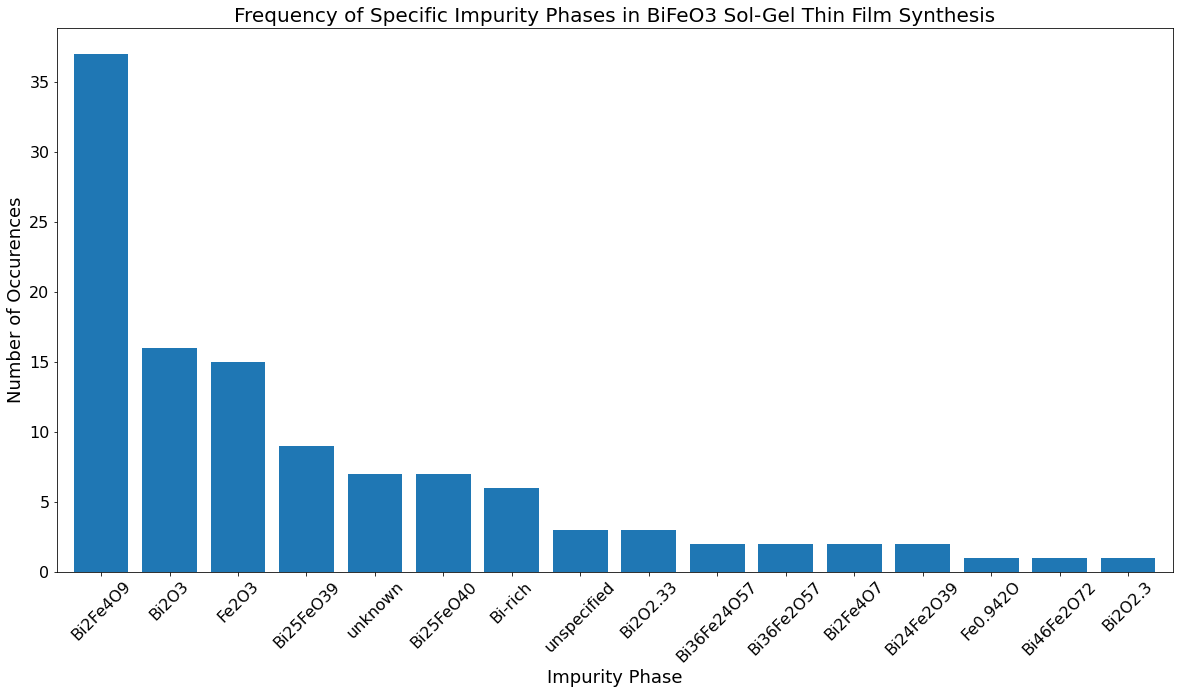

In [6]:
impurities = list(lit_df['reported_impurities'])

impurities_list = []
for rep in impurities:
    if rep not in ['[]', np.nan]:
        strings = rep[1:-1]
        imps = [imp for imp in strings.split(', ')]
        for imp in imps:
            if imp != "'amorphous'":
                impurities_list.append(imp[1:-1])
                
impurities_series = pd.Series(impurities_list)

impurities_series.replace('unkown', 'unknown', inplace=True)

impurities_series.sort_values(inplace=True)

plt.figure(figsize=(20,10))
impurities_series.value_counts().plot(kind='bar', width=0.8)
plt.title('Frequency of Specific Impurity Phases in BiFeO3 Sol-Gel Thin Film Synthesis', fontsize=20)
plt.xlabel('Impurity Phase', fontsize=18)
plt.ylabel('Number of Occurences', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

{'2_ethoxyethanol': 5,
 'acetic_acid': 1,
 'ethanol': 3,
 'formamide': 1,
 'nitric_acid': 12,
 'nn_dimethylformamide': 3,
 'polyethylene_glycol': 1,
 'propionic_acid': 2,
 'propylene_glycol': 1,
 'trimethylene_glycol': 1,
 'water': 1}


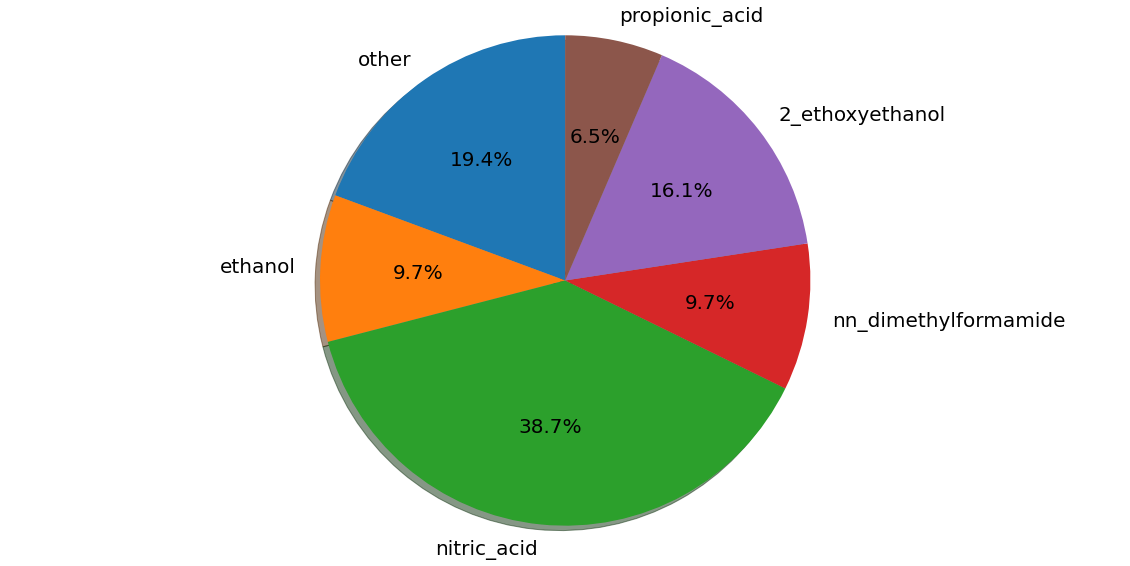

In [7]:
solvents_pie = {}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)

for solv1, solv2 in zip(solvs1, solvs2):
    if solv1 and solv1 not in ['2_methoxyethanol', 'ethylene_glycol']:
        if solv1 not in solvents_pie.keys():
            solvents_pie[solv1] = 1
        else:
            solvents_pie[solv1] += 1
    if solv2 and solv2 not in ['2_methoxyethanol', 'ethylene_glycol']:
        if solv2 not in solvents_pie.keys():
            solvents_pie[solv2] = 1
        else:
            solvents_pie[solv2] += 1
            
pprint(solvents_pie)

plot_counter = {'other' : 0}
for solv in solvents_pie:
    if solvents_pie[solv] <= 1:
        plot_counter['other'] += solvents_pie[solv]
    else:
        plot_counter[solv] = solvents_pie[solv]

solv_labels = [key for key in plot_counter]
solv_sizes = [plot_counter[key] for key in plot_counter]

fig, solv_ax = plt.subplots(1,1, figsize=(20,10))
solv_ax.pie(solv_sizes, labels=solv_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
solv_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.}

plt.show()

In [8]:
# 2-way Venn diagram for solvents

solvents = {
    '2_methoxyethanol' : 0,
    'ethylene_glycol' : 0,
    'both' : 0
}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)

for solv1, solv2 in zip(solvs1, solvs2):
    if solv1 and solv1 not in solvents.keys():
        solvents[solv1] = 1
    if solv2 and solv2 not in solvents.keys():
        solvents[solv2] = 1
        
    if solv1 and solv2:
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvents['both'] += 1
        else:
            solvents[solv1] += 1
            solvents[solv2] += 1
    elif solv1 and not solv2:
        solvents[solv1] += 1
    elif not solv1 and solv2:
        solvents[solv2] += 1

pprint(solvents)

{'2_ethoxyethanol': 6,
 '2_methoxyethanol': 236,
 'acetic_acid': 2,
 'both': 29,
 'ethanol': 4,
 'ethylene_glycol': 54,
 'formamide': 2,
 'nitric_acid': 13,
 'nn_dimethylformamide': 4,
 'polyethylene_glycol': 2,
 'propionic_acid': 3,
 'propylene_glycol': 2,
 'trimethylene_glycol': 2,
 'water': 2}


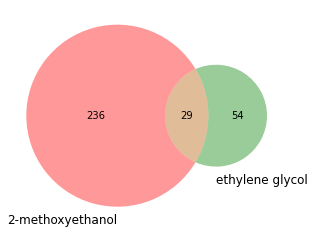

In [9]:
venn2(
    subsets=(
        solvents['2_methoxyethanol'],
        solvents['ethylene_glycol'],
        solvents['both']), 
    set_labels=('2-methoxyethanol', 'ethylene glycol'))

{'acetylacetone': 1,
 'ammonium_hydroxide': 12,
 'diethanolamine': 1,
 'ethanolamine': 3,
 'nitric_acid': 6}
here
here


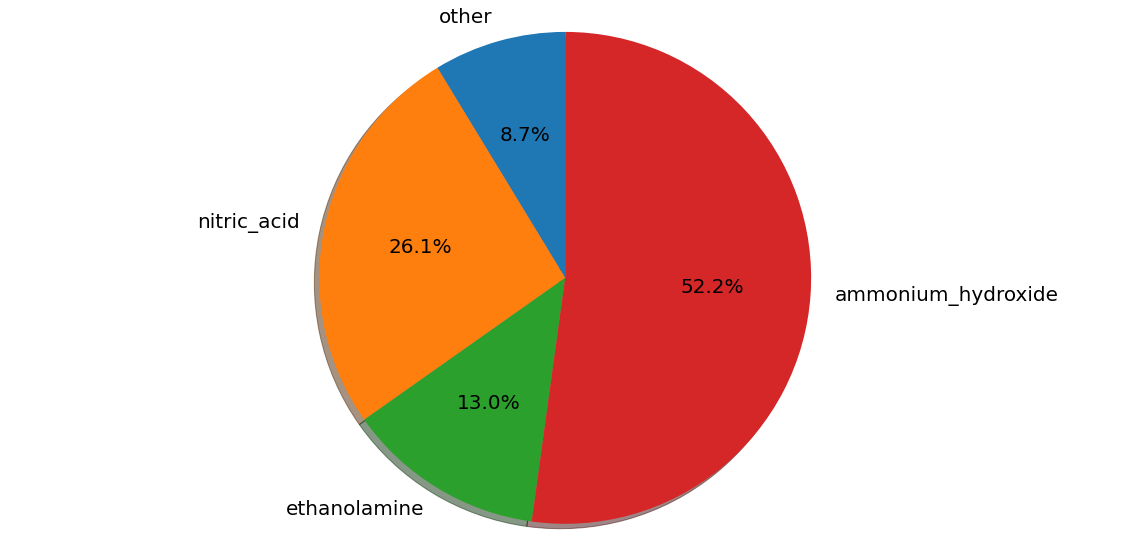

In [10]:
chel_pie = {}

chels1 = df['chelating_agent1'].fillna(0)
chels2 = df['chelating_agent2'].fillna(0)
chels3 = df['chelating_agent3'].fillna(0)

for chel1, chel2, chel3 in zip(chels1, chels2, chels3):
    if chel1 and chel1 not in ['acetic_acid', 'citric_acid']:
        if chel1 not in chel_pie.keys():
            chel_pie[chel1] = 1
        else:
            chel_pie[chel1] += 1
    if chel2 and chel2 not in ['acetic_acid', 'citric_acid']:
        if chel2 not in chel_pie.keys():
            chel_pie[chel2] = 1
        else:
            chel_pie[chel2] += 1
    if chel3 and chel3 not in ['acetic_acid', 'citric_acid']:
        if chel3 not in chel_pie.keys():
            chel_pie[chel3] = 1
        else:
            chel_pie[chel3] += 1
            
pprint(chel_pie)

plot_counter = {'other' : 0}
for chel in chel_pie:
    if chel_pie[chel] <= 1:
        print('here')
        plot_counter['other'] += chel_pie[chel]
    else:
        plot_counter[chel] = chel_pie[chel]

chel_labels = [key for key in plot_counter]
chel_sizes = [plot_counter[key] for key in plot_counter]

fig, chel_ax = plt.subplots(1,1, figsize=(20,10))
chel_ax.pie(chel_sizes, labels=chel_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 20})
chel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.}

plt.show()

In [11]:
# 2-way Venn diagram for chelating agents

chelating_agents = {
    'acetic_acid' : 0,
    'citric_acid' : 0,
    'both' : 0
}

chels1 = df['chelating_agent1'].fillna(0)
chels2 = df['chelating_agent2'].fillna(0)
chels3 = df['chelating_agent3'].fillna(0)

for chel1, chel2, chel3 in zip(chels1, chels2, chels3):
    if chel1 and chel1 not in chelating_agents.keys():
        chelating_agents[chel1] = 1
    if chel2 and chel2 not in chelating_agents.keys():
        chelating_agents[chel2] = 1
    if chel3 and chel3 not in chelating_agents.keys():
        chelating_agents[chel3] = 1
        
    if chel1 and chel2 and chel3:
        if chel1 == 'acetic_acid' and (chel2 == 'citric_acid' or chel3 == 'citric_acid'):
            chelating_agents['both'] += 1
        else:
            chelating_agents[chel1] += 1
            chelating_agents[chel2] += 1
            chelating_agents[chel3] += 1
    elif chel1 and chel2:
        if chel1 == 'acetic_acid' and chel2 == 'citric_acid':
            chelating_agents['both'] += 1
        else:
            chelating_agents[chel1] += 1
            chelating_agents[chel2] += 1
    elif chel1 and chel3:
        if chel1 == 'acetic_acid' and chel3 == 'citric_acid':
            chelating_agents['both'] += 1
        else:
            chelating_agents[chel1] += 1
            chelating_agents[chel3] += 1
    elif chel2 and chel3:
        if chel2 == 'acetic_acid' and chel3 == 'citric_acid':
            chelating_agents['both'] += 1
        else:
            chelating_agents[chel2] += 1
            chelating_agents[chel3] += 1
    elif chel1:
        chelating_agents[chel1] += 1
    elif chel2:
        chelating_agents[chel2] += 1
    elif chel3:
        chelating_agents[chel3] += 1

pprint(chelating_agents)

{'acetic_acid': 107,
 'acetylacetone': 2,
 'ammonium_hydroxide': 13,
 'both': 7,
 'citric_acid': 61,
 'diethanolamine': 2,
 'ethanolamine': 4,
 'nitric_acid': 6}


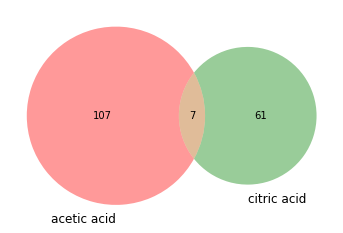

In [12]:
venn2(
    subsets=(
        chelating_agents['acetic_acid'],
        chelating_agents['citric_acid'],
        chelating_agents['both']), 
    set_labels=('acetic acid', 'citric acid'))

In [13]:
# 3-way Venn diagram for solvents and acetic acid

solvs_aa = {
    '2_methoxyethanol' : 0,
    'ethylene_glycol' : 0,
    'MOE_EG' : 0,
    'acetic_acid' : 0,
    'MOE_AA' : 0,
    'EG_AA' : 0,
    'all' : 0
}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)
chels1 = df['chelating_agent1'].fillna(0)
 
for solv1, solv2, chel1 in zip(solvs1, solvs2, chels1):
        
    if solv1 and solv2 and chel1:
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol' and chel1 == 'acetic_acid':
            solvs_aa['all'] += 1
        elif solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvs_aa['MOE_EG'] += 1
        elif (solv1 == 'ethylene_glycol' or solv2 == 'ethylene_glycol') and chel1 == 'acetic_acid':
            solvs_aa['EG_AA'] += 1
        elif solv1 == '2_methoxythanol' and chel1 == 'acetic_acid':
            solvs_aa['MOE_AA'] += 1
        elif chel1 == 'acetic_acid':
            solvs_aa['acetic_acid'] += 1
        elif solv1 == 'ethylene_glycol' or solv2 == 'ethylene_glycol':
            solvs_aa['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_aa['2_methoxyethanol'] += 1
            
    elif solv2 and chel1:
        if solv2 == 'ethylene_glycol' and chel1 == 'acetic_acid':
            solvs_aa['EG_AA'] += 1
        elif solv2 == 'ethylene_glycol':
            solvs_aa['ethylene_glycol'] += 1
        elif chel1 == 'acetic_acid':
            solvs_aa['acetic_acid'] += 1
   
    elif solv1 and chel1:
        if solv1 == 'ethylene_glcyol' and chel1 == 'acetic_acid':
            solvs_aa['EG_AA'] += 1
        elif solv1 == '2_methoxyethanol' and chel1 == 'acetic_acid':
            solvs_aa['MOE_AA'] +=1
        elif chel1 == 'acetic_acid':
            solvs_aa['acetic_acid'] += 1
        elif solv1 == 'ethylene_glycol':
            solvs_aa['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_aa['2_methoxyethanol'] += 1
            
    elif solv1 and solv2:
        if solv1 and solv1 not in solvs_aa.keys():
            solvs_aa[solv1] = 1
        if solv2 and solv2 not in solvs_aa.keys():
            solvs_aa[solv2] = 1
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvs_aa['MOE_EG'] += 1
        else:
            solvs_aa[solv1] += 1
            solvs_aa[solv2] += 1
                
    elif chel1:
        if chel1 == 'acetic_acid':
            solvs_aa['acetic_acid'] += 1
            
    elif solv2:
        if solv2 == 'ethylene_glycol':
            solvs_aa['ethylene_glycol'] += 1
            
    elif solv1:
        if solv1 == 'ethylene_glycol':
            solvs_aa['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_aa['2_methoxyethanol'] += 1

pprint(solvs_aa)

{'2_methoxyethanol': 160,
 'EG_AA': 9,
 'MOE_AA': 76,
 'MOE_EG': 21,
 'acetic_acid': 21,
 'all': 8,
 'ethanol': 2,
 'ethylene_glycol': 45,
 'formamide': 2,
 'polyethylene_glycol': 2,
 'propionic_acid': 3}


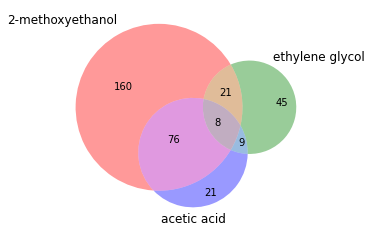

In [14]:
venn3(
    subsets=(
        [solvs_aa[key] for key in solvs_aa.keys()]
    ),
    set_labels=('2-methoxyethanol', 'ethylene glycol', 'acetic acid')
)

In [15]:
# 3-way Venn diagram for solvents and citric acid

In [16]:
solvs_ca = {
    '2_methoxyethanol' : 0,
    'ethylene_glycol' : 0,
    'MOE_EG' : 0,
    'citric_acid' : 0,
    'MOE_CA' : 0,
    'EG_CA' : 0,
    'all' : 0
}

solvs1 = df['solvent1'].fillna(0)
solvs2 = df['solvent2'].fillna(0)

ca_bool = (df['chelating_agent1'] == 'citric_acid') | (df['chelating_agent2'] == 'citric_acid') | (df['chelating_agent3'] == 'citric_acid')

chels = []
for ind in ca_bool:
    if ind:
        chels.append('citric_acid')
    else:
        chels.append(0)

chels = pd.Series(chels)

for solv1, solv2, chel1 in zip(solvs1, solvs2, chels):
        
    if solv1 and solv2 and chel1:
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol' and chel1 == 'citric_acid':
            solvs_ca['all'] += 1
        elif solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvs_ca['MOE_EG'] += 1
        elif (solv1 == 'ethylene_glycol' or solv2 == 'ethylene_glycol') and chel1 == 'citric_acid':
            solvs_ca['EG_CA'] += 1
        elif solv1 == '2_methoxythanol' and chel1 == 'citric_acid':
            solvs_ca['MOE_CA'] += 1
        elif chel1 == 'citric_acid':
            solvs_ca['citric_acid'] += 1
        elif solv1 == 'ethylene_glycol' or solv2 == 'ethylene_glycol':
            solvs_ca['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_ca['2_methoxyethanol'] += 1
            
    elif solv2 and chel1:
        if solv2 == 'ethylene_glycol' and chel1 == 'citric_acid':
            solvs_ca['EG_CA'] += 1
        elif solv2 == '2_methoxyethanol' and chel1 == 'citric_acid':
            solvs_ca['MOE_CA'] +=1
        elif chel1 == 'citric_acid':
            solvs_ca['citric_acid'] += 1
        elif solv2 == 'ethylene_glycol':
            solvs_ca['ethylene_glycol'] += 1
        elif solv2 == '2_methoxyethanol':
            solvs_ca['2_methoxyethanol'] += 1
   
    elif solv1 and chel1:
        if solv1 == 'ethylene_glycol' and chel1 == 'citric_acid':
            solvs_ca['EG_CA'] += 1
        elif solv1 == '2_methoxyethanol' and chel1 == 'citric_acid':
            solvs_ca['MOE_CA'] +=1
        elif chel1 == 'citric_acid':
            solvs_ca['citric_acid'] += 1
        elif solv1 == 'ethylene_glycol':
            solvs_ca['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_ca['2_methoxyethanol'] += 1
            
    elif solv1 and solv2:
        if solv1 and solv1 not in solvs_ca.keys():
            solvs_ca[solv1] = 1
        if solv2 and solv2 not in solvs_ca.keys():
            solvs_ca[solv2] = 1
        if solv1 == '2_methoxyethanol' and solv2 == 'ethylene_glycol':
            solvs_ca['MOE_EG'] += 1
        else:
            solvs_ca[solv1] += 1
            solvs_ca[solv2] += 1
                
    elif chel1:
        if chel1 == 'citric_acid':
            solvs_ca['citric_acid'] += 1
            
    elif solv1:
        if solv1 == 'ethylene_glycol':
            solvs_ca['ethylene_glycol'] += 1
        elif solv1 == '2_methoxyethanol':
            solvs_ca['2_methoxyethanol'] += 1
            
    elif solv2:
        if solv2 == 'ethylene_glycol':
            solvs_ca['ethylene_glycol'] += 1

pprint(solvs_ca)

{'2_methoxyethanol': 196,
 'EG_CA': 23,
 'MOE_CA': 40,
 'MOE_EG': 27,
 'acetic_acid': 2,
 'all': 2,
 'citric_acid': 3,
 'ethanol': 4,
 'ethylene_glycol': 31,
 'formamide': 2,
 'polyethylene_glycol': 2,
 'propionic_acid': 3,
 'propylene_glycol': 2}


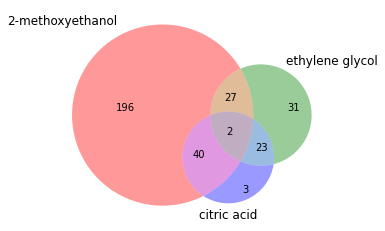

In [17]:
venn3(
    subsets=(
        [solvs_ca[key] for key in solvs_ca.keys()]
    ),
    set_labels=('2-methoxyethanol', 'ethylene glycol', 'citric acid')
)

In [38]:
lit_df['phase_pure'] = lit_df['reported_impurities'] == '[]'
lit_df['phase_pure'].replace({True : "Phase Pure", False: "Phase Impure"}, inplace=True)

<ipython-input-38-bebe48ce56f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lit_df['phase_pure'] = lit_df['reported_impurities'] == '[]'
/Users/kevcruse96/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [39]:
# Violin plot for sol-gel temperatures

drying_temps = lit_df[['dry_degC', 'phase_pure']].dropna()

dry_df = pd.DataFrame({
    'Temperature (°C)' : drying_temps['dry_degC'],
    'PhasePure' : drying_temps['phase_pure'],
    'Step' : "Drying",
    'Substep' : "Layer",
    'CoarseStep' : "Drying"
})

layer_prebake_temps = lit_df[['layer_prebake_degC', 'phase_pure']].dropna()
final_prebake_temps = lit_df[['final_prebake_degC', 'phase_pure']].dropna()

layer_prebake_df = pd.DataFrame({
    'Temperature (°C)' : layer_prebake_temps['layer_prebake_degC'],
    'PhasePure' : layer_prebake_temps['phase_pure'],
    'Step' : "Prebake",
    'Substep' : "Layer",
    'CoarseStep' : "Prebake (Layer)"
})

final_prebake_df = pd.DataFrame({
    'Temperature (°C)' : final_prebake_temps['final_prebake_degC'],
    'PhasePure' : final_prebake_temps['phase_pure'],
    'Step' : "Prebake",
    'Substep' : "Final",
    'CoarseStep' : "Prebake (Final)"
})

prebake_df = pd.concat((layer_prebake_df, final_prebake_df), axis=0)

layer_anneal_temps = lit_df[['layer_annealing_degC', 'phase_pure']].dropna()
final_anneal_temps = lit_df[['final_annealing_degC', 'phase_pure']].dropna()

layer_anneal_df = pd.DataFrame({
    'Temperature (°C)' : layer_anneal_temps['layer_annealing_degC'],
    'PhasePure' : layer_anneal_temps['phase_pure'],
    'Step' : "Anneal",
    'Substep' : "Layer",
    'CoarseStep' : "Anneal (Layer)"
})

final_anneal_df = pd.DataFrame({
    'Temperature (°C)' : final_anneal_temps['final_annealing_degC'],
    'PhasePure' : final_anneal_temps['phase_pure'],
    'Step' : "Anneal",
    'Substep' : "Final",
    'CoarseStep' : "Anneal (Final)"
})

anneal_df = pd.concat((layer_anneal_df, final_anneal_df), axis=0)

# combine all temperature data
temps_df = pd.concat((dry_df, prebake_df, anneal_df), axis=0)

display(temps_df)

,Temperature (°C),PhasePure,Step,Substep,CoarseStep
15,250.0,Phase Pure,Drying,Layer,Drying
16,250.0,Phase Pure,Drying,Layer,Drying
17,250.0,Phase Pure,Drying,Layer,Drying
18,250.0,Phase Impure,Drying,Layer,Drying
19,250.0,Phase Impure,Drying,Layer,Drying
...,...,...,...,...,...
335,500.0,Phase Pure,Anneal,Final,Anneal (Final)
336,550.0,Phase Pure,Anneal,Final,Anneal (Final)
337,600.0,Phase Impure,Anneal,Final,Anneal (Final)
338,600.0,Phase Pure,Anneal,Final,Anneal (Final)


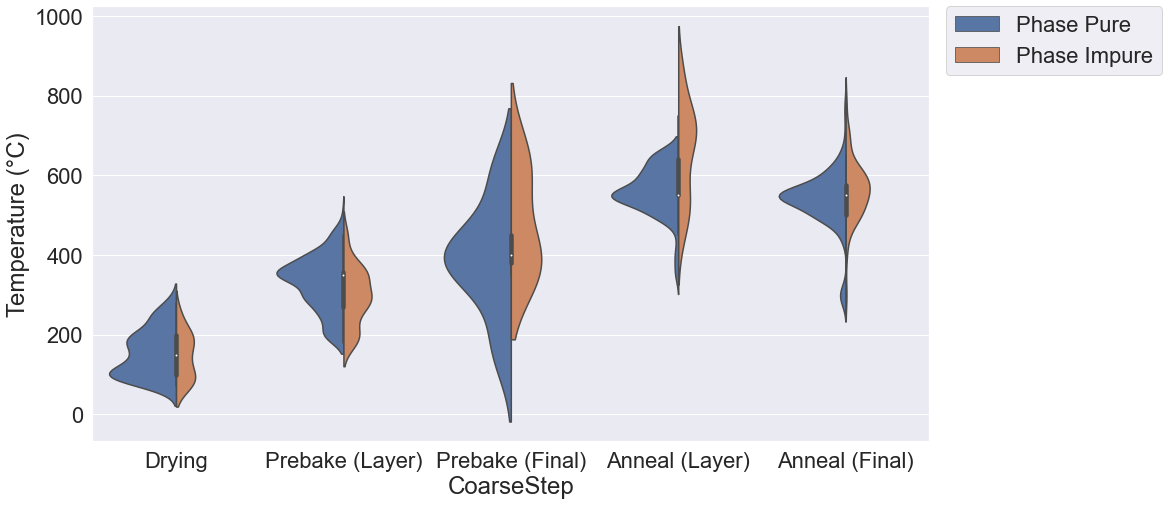

In [43]:
# Create two distinct sides for each violin, one for phase pure temperatures and one for phase impure

sns.set(rc={'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid")
sns.set(font_scale = 2)

# need to make a separate df with prebake as another heating operation for this figure
ax = sns.violinplot(
    y='Temperature (°C)', 
    x='CoarseStep', 
    data=temps_df, 
    hue='PhasePure', 
    fontsize=20, 
    split=True,
    scale='count',
    scale_hue=True
)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

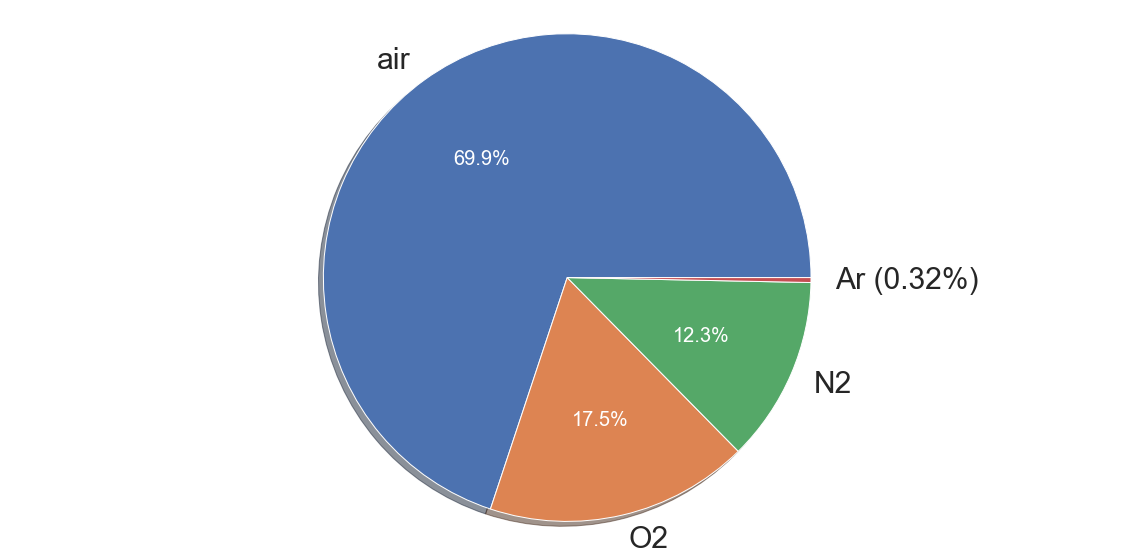

In [52]:
# Pie chart for annealing environments

env_pie = {
    'air' : 0,
    'O2' : 0,
    'N2' : 0,
    'Ar' : 0
}

envs = lit_df['atmosphere'].dropna()

for env in envs:
    if env.startswith('a'):
        env = "air"
    env_pie[env] += 1

env_labels = [key for key in env_pie]
env_sizes = [env_pie[key] for key in env_pie]

fig, env_ax = plt.subplots(1,1, figsize=(20,10))
wedges, labels, autopct = env_ax.pie(env_sizes, labels=env_labels, autopct='%1.1f%%',
        shadow=True, startangle=00, textprops={'fontsize': 20})

plt.setp(labels, fontsize=30, fontweight="normal")
plt.setp(autopct, color="white")
env_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.}

for patch, label, txt in zip(wedges, labels, autopct):
    if (patch.theta2 - patch.theta1) <= 15:
        # the angle at which the text is normally located
        angle = (patch.theta2 + patch.theta1) / 2.
        pct = "{:.2f}".format(100*(patch.theta2 - patch.theta1)/360)
        # new distance to the pie center
        x = patch.r * 1.1 * np.cos(angle * np.pi / 180)
        y = patch.r * 1.1 * np.sin(angle * np.pi / 180)
        # move text to new position
        #label.set_position((x, y))
        txt.set_text('')
        label.set_text(label.get_text() + " (" + pct + "%)")
        label.set_position((x,y))

plt.show()